In [10]:
# import our modules
import sqlite3
import pandas as pd

# connect to the database
con = sqlite3.connect('portal_mammals.sqlite')

# execute a query and save the results to a dataframe
surveys_df = pd.read_sql("SELECT * FROM surveys", con)

In [11]:
surveys_df.dtypes


record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [12]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [13]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [14]:
surveys_df.shape

(35549, 9)

In [15]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [16]:
surveys_df.head(15)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [17]:
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,None,NaN,NaN
35545,35546,12,31,2002,15,AH,None,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,None,None,NaN,NaN


In [18]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [19]:
pd.unique(surveys_df['species_id'])
# OR
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', None, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [20]:
site_names = pd.unique(surveys_df["plot_id"])

In [21]:
site_names.size

24

In [22]:
len(site_names)

24

In [23]:
surveys_df['plot_id'].nunique()

24

In [24]:
len(pd.unique(surveys_df["species_id"])) 

49

In [25]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [31]:
surveys_df['weight'].min()

4.0

In [32]:
surveys_df['weight'].max()

280.0

In [33]:
surveys_df['weight'].std()

36.63125947458399

In [34]:
surveys_df['weight'].count()

32283

In [35]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

In [40]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()


record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [41]:
# Provide the mean for each numeric column by sex
grouped_data.mean(numeric_only=True)

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


In [42]:
surveys_df.groupby(['plot_id', 'sex']).agg({"year": 'max',
                                           "hindfoot_length": 'median',
                                           "weight": 'mean'})

year  hindfoot_length     weight
plot_id sex                                  
1       F    2002             34.0  46.311138
        M    2002             36.0  55.950560
2       F    2002             33.0  52.561845
        M    2002             33.0  51.391382
3       F    2002             22.0  31.215349
        M    2002             22.0  34.163241
4       F    2002             36.0  46.818824
        M    2002             36.0  48.888119
5       F    2002             34.0  40.974806
        M    2002             34.0  40.708551
6       F    2002             25.0  36.352288
        M    2002             25.0  36.867388
7       F    2002             20.0  20.006135
        M    2002             20.0  21.194719
8       F    2002             35.0  45.623011
        M    2002             36.0  49.641372
9       F    2002             36.0  53.618469
        M    2002             36.0  49.519309
10      F    2002             17.0  17.094203
        M    2002             17.0  19.971223
11      F    2002             35.0  43.515075
        M    2002             36.0  43.366197
12      F    2002             35.0  49.831731
        M    2002             35.0  48.909710
13      F    2002             25.0  40.524590
        M    2002             26.0  40.097754
14      F    2002             35.0  47.355491
        M    2002             36.0  45.159378
15      F    2002             21.0  26.670236
        M    2002             21.0  27.523691
16      F    2002             21.0  25.810427
        M    2002             21.0  23.811321
17      F    2002             34.0  48.176201
        M    2002             35.0  47.558853
18      F    2002             25.0  36.963514
        M    2002             26.0  43.546952
19      F    2002             21.0  21.978599
        M    2002             21.0  20.306878
20      F    2002             25.0  52.624406
        M    2002             26.0  44.197279
21      F    2002             24.0  25.974832
        M    2002             21.0  22.772622
22      F    2002             36.0  53.647059
        M    2002             36.0  54.572531
23      F    2002             18.0  20.564417
        M    2002             18.0  18.941463
24      F    2002             22.0  47.914405
        M    2002             21.0  39.321503

In [43]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [44]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

In [45]:
surveys_df.groupby('species_id').count()['record_id']

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

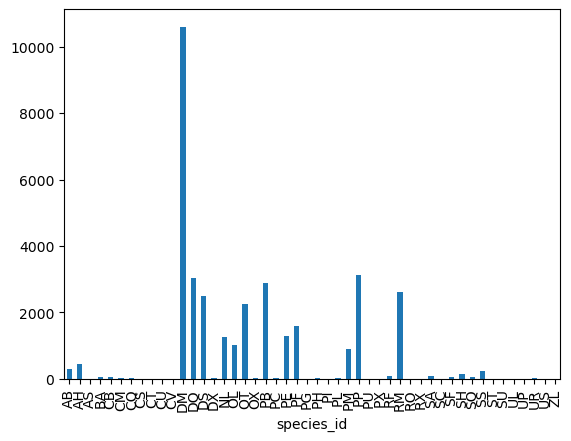

In [46]:
# Make sure figures appear inline in Jupyter Notebook
%matplotlib inline
# Create a quick bar chart
species_counts.plot(kind='bar');

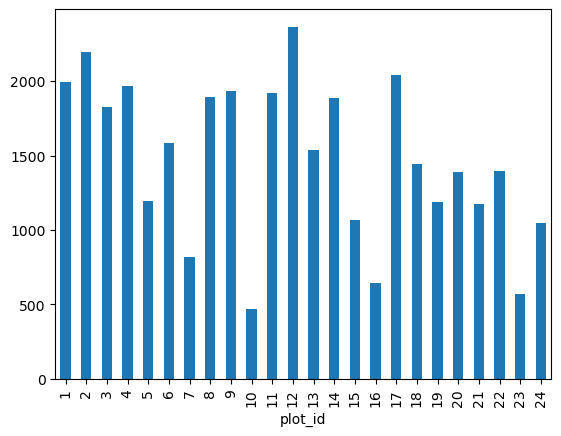

In [47]:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# Let's plot that too
total_count.plot(kind='bar');

<Axes: xlabel='plot_id'>

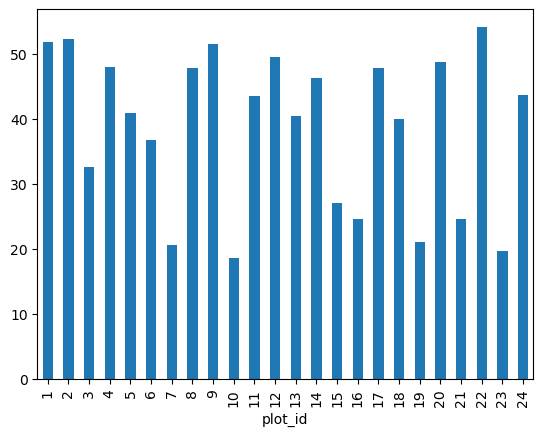

In [48]:
surveys_df.groupby('plot_id')["weight"].mean().plot(kind='bar')


<Axes: xlabel='sex'>

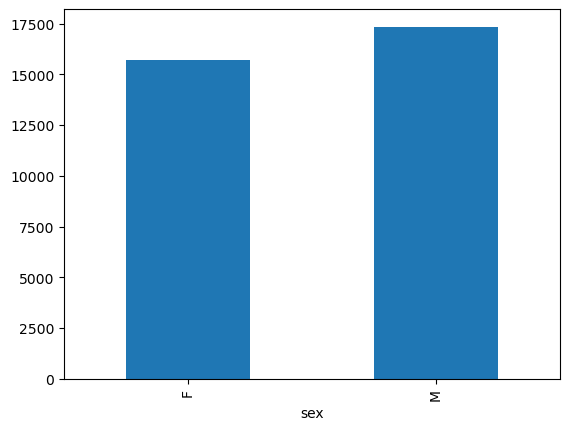

In [49]:
surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')


In [50]:
by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()


In [51]:
by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
site_sex_count.unstack()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Text(0.5, 0, 'Plot')

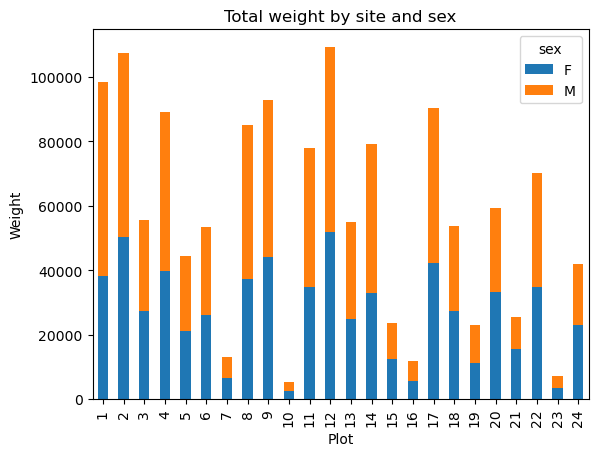

In [52]:
by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
spc = site_sex_count.unstack()
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")

In [53]:
# our original surveys table
surveys_df = pd.read_sql("SELECT * FROM surveys", con)
# an additional table of species (but only some of them)
species_df = pd.read_sql("SELECT * FROM species LIMIT 20", con)
# look at our new DataFrame
species_df

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


In [54]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)
# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)
# Reset the index values to the second DataFrame appends properly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

In [55]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

In [56]:
merged_inner = pd.merge(left=survey_sub, right=species_df, left_on='species_id', right_on='species_id')
merged_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent


In [57]:
merged_left = pd.merge(left=survey_sub, right=species_df, how='left', left_on='species_id', right_on='species_id')
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,NaN,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN
